<a href="https://www.kaggle.com/code/pumpkin18/gender-classification-using-decision-tree?scriptVersionId=121318459" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#97DECE;overflow:hidden;font-weight:500">Gender Classification Using Decision Tree 👨 👩 </div>





<img src="https://media.giphy.com/media/l4Epfl2QCd6J8b7qg/giphy.gif">

<div id='imports'
     style = "display: fill;
              border-radius: 10px;
              background-color: #FF97C1;">
    <h2 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Table of Contents
    </h2>
</div>


- [1. Introduction](#1)
- [2. Data Preprocessing](#2)
- [3. Model Building](#3)
- [4. Model Evaluation ](#4)
- [5. K Fold Cross Validation ](#5)


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #3282B8;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction 
    </h1>
</div>

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries 
    </h3>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #3282B8;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Data Preprocessing
    </h1>
</div>

In [2]:
#reading the dataset
df=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
#Checking # of rows and columns
df.shape

(5001, 8)

In [4]:
#checking info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [5]:
#Checking for null values
df.isnull().sum() #NO null values

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
X =df.drop(['gender'],axis=1)
y=df['gender']

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Splitting the dataset into Training and Testing 
    </h3>
</div>

In [7]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2)
print(f"Length of train dataset = {train_df.shape[0]}")
print(f"Length of test dataset = {test_df.shape[0]}")

Length of train dataset = 4000
Length of test dataset = 1001


In [8]:
#Separating dependent and independent variables
y_train=train_df['gender']
X_train=train_df.drop(['gender'],axis=1)

<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #3282B8;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Building 
    </h1>
</div>

In [9]:
#model
model=DecisionTreeClassifier()
model=model.fit(X_train,y_train)

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Plotting Decision Tree 
    </h3>
</div>

In [10]:
feature_names=train_df.drop(['gender'],axis=1).columns
class_names=['Male','Female']

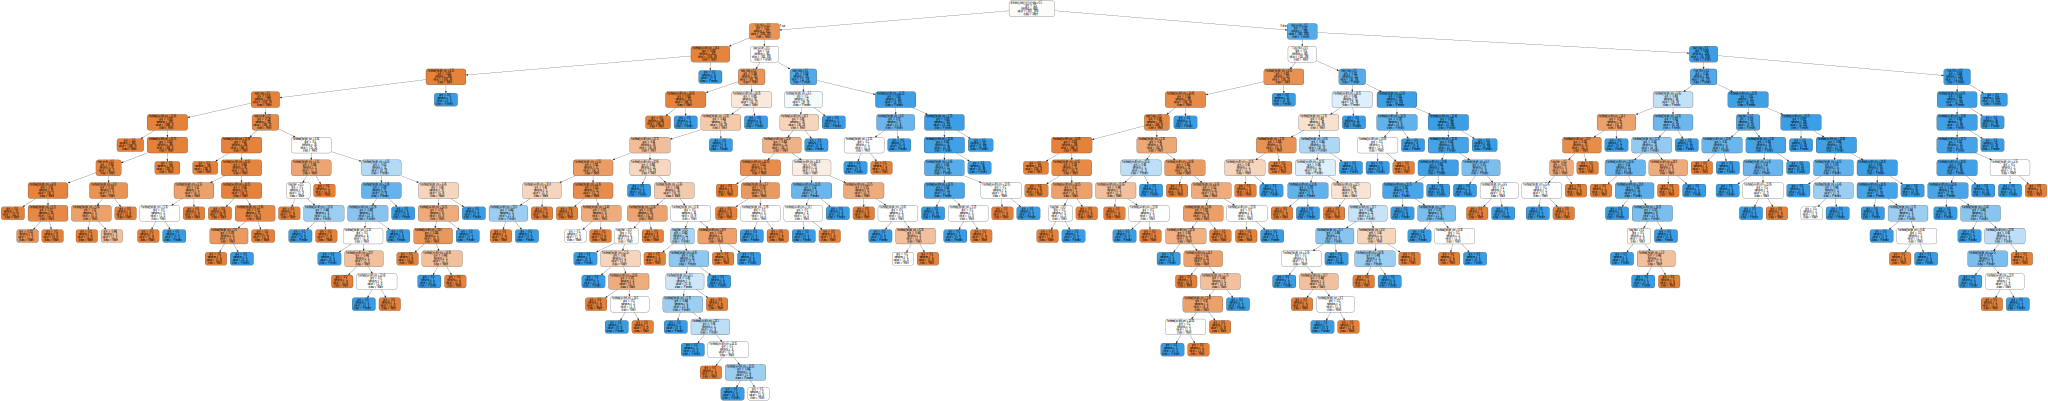

In [11]:
dot_data=tree.export_graphviz(model,out_file=None,
                             feature_names=feature_names,
                             class_names=class_names,
                             filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data,format='png')
graph

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Predicting Results 
    </h3>
</div>

In [12]:
X_test=test_df.drop(['gender'],axis=1)
y_test=test_df['gender']
y_pred=model.predict(X_test)
y_pred

array(['Male', 'Female', 'Female', ..., 'Female', 'Male', 'Male'],
      dtype=object)

<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #3282B8;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Evaluation 
    </h1>
</div>

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy 
    </h3>
</div>

In [13]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("Model Test Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Train Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Test Accuracy : 0.9560
Model Train Accuracy : 0.9985


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Confusion Matrix 
    </h3>
</div>

In [14]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[452  22]
 [ 22 505]]

True Positives(TP) =  452

True Negatives(TN) =  505

False Positives(FP) =  22

False Negatives(FN) =  22


<AxesSubplot:>

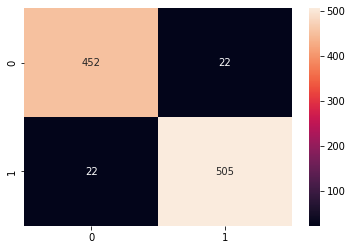

In [15]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Classification Report 
    </h3>
</div>

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Female       0.95      0.95      0.95       474
        Male       0.96      0.96      0.96       527

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Scores From Confusion Matrix 
    </h3>
</div>

In [17]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9560
Classification error : 0.0440
Precision : 0.9536
Recall or Sensitivity : 0.9536
True Positive Rate : 0.9536
False Positive Rate : 0.0417
Specificity : 0.9583


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve  
    </h3>
</div>

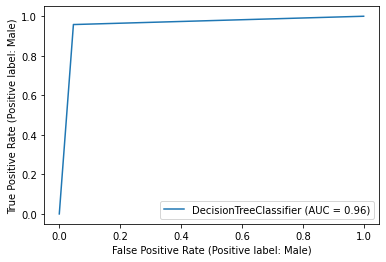

In [18]:
from sklearn import metrics
metrics.plot_roc_curve(model,X_test,y_test)
plt.show()

<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC AUC Score 
    </h3>
</div>

In [19]:
 #compute ROC AUC
LabelEncoder=LabelEncoder()
y_test=LabelEncoder.fit_transform(y_test)
y_pred=LabelEncoder.fit_transform(y_pred)
ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9559


<div id='load_data'
     style = "display: fill;
              border-radius: 10px;
              background-color: #90B77D;">
    <h3 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">Cross Validated ROC AUC
    </h3>
</div>

In [20]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9622


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #3282B8;">
    <h1 style = "padding: 15px; 
                 color: White;
                 text-align: left;
                 font-family: Trebuchet MS;">K Fold Cross Validation
    </h1>
</div>

In [21]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


model_k=DecisionTreeClassifier()

scores = cross_val_score(model_k, X, y, cv=kfold)
# print cross-validation scores 

print('Stratified cross-validation scores :{}'.format(scores))
# print average cross-validation score with linear kernel

print('\nAverage stratified cross-validation score :{:.4f}'.format(scores.mean()))

Stratified cross-validation scores :[0.95904096 0.97       0.954      0.971      0.967     ]

Average stratified cross-validation score :0.9642


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #0E8388;">
    <h1 style = "padding: 30px; 
                 color: white;
                 font-weight:600;
                 font-size:50px;
                 text-align: CENTER;
                 font-family: Tilt Warp;">PLEASE UPVOTE IF IT HELPED
    </h1>
</div>